# College Scorecard

## Due Tuesday, May 24 at 8 AM

To help students and their families make more informed decisions about what college to attend, the U.S. Department of Education released the [College Scorecard](https://collegescorecard.ed.gov/data/), which contains data about the costs, socioeconomic indicators, and the outcomes (e.g., salaries) of all colleges in the U.S. There are over 1700 variables in this data set! The website above contains documentation for this data; you will absolutely need to read this documentation to understand what is in this data set.

In this lab, you will build several models that use demographic information about the student body (e.g., SAT score, family income, racial diversity, etc.) to predict the median salary of students 10 years after graduation. You will use cross-validation to select the best model. Then, you will use your model to estimate the "value-added" of each college and produce your own college rankings!

Value added is the diff between actual salary and predicted
Skip #3 until we learn about it.

In [1]:
import pandas as pd
data = pd.read_csv("/data/collegescorecard/merged_2011_PP.csv", encoding="ISO-8859-1")
data

,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,...,PELL_RPY_3YR_RT_SUPP,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP,C200_L4_POOLED_SUPP,C200_4_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,NaN,NaN,NaN,...,0.455279503106,0.5,0.504513540622,0.420550847458,0.470229007634,0.455089820359,NaN,NaN,NaN,NaN
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,NaN,NaN,NaN,...,0.732501356484,0.844773790952,0.790354330709,0.757345971564,0.761989342806,0.797997644287,NaN,NaN,NaN,NaN
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,NaN,NaN,NaN,...,0.5,0.636363636364,0.487012987013,0.609523809524,0.515625,0.577319587629,NaN,NaN,NaN,NaN
3,100706,105500,1055,University of Alabama at Huntsville,Huntsville,AL,35899,NaN,NaN,NaN,...,0.735384615385,0.839116719243,0.775700934579,0.77975376197,0.774757281553,0.788643533123,NaN,NaN,NaN,NaN
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,NaN,NaN,NaN,...,0.308108108108,0.425287356322,0.354420731707,0.290803645402,0.300215982721,0.346017699115,NaN,NaN,NaN,NaN
5,100751,105100,1051,The University of Alabama,Tuscaloosa,AL,35487-0166,NaN,NaN,NaN,...,0.777391304348,0.869338885997,0.830869565217,0.805986103688,0.795348837209,0.844343204252,NaN,NaN,NaN,NaN
6,100760,100700,1007,Central Alabama Community College,Alexander City,AL,35010,NaN,NaN,NaN,...,0.426829268293,0.657142857143,0.485964912281,0.479768786127,0.481958762887,0.525510204082,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7668,45897303,145994,1459,Strayer University-Northwest Houston,Houston,TX,77064,NaN,NaN,NaN,...,0.382969187675,0.598877708978,0.45032151006,0.489341544292,0.462439696761,0.481726354454,NaN,NaN,NaN,NaN
7669,45897304,145995,1459,Strayer University-Plano,Plano,TX,75093,NaN,NaN,NaN,...,0.382969187675,0.598877708978,0.45032151006,0.489341544292,0.462439696761,0.481726354454,NaN,NaN,NaN,NaN


## Question 1 (20 points)

Let's start with a warm-up. Let's build a model to predict the median 10-year salary of a college from its median SAT Verbal score alone. You should restrict to schools that predominantly award Bachelor's degrees (`PREDDEG == 3`). This includes research universities like Harvard and UC Berkeley, but filters out community colleges and schools like UCSF, which only award graduate degrees.

Make a scatterplot of this data. Then, fit polynomial models of the form 

$$ Y = \beta_0 + \beta_1 X + ... + \beta_p X^p $$

for $p = 1, 2, 3, ...$. Calculate the training error as a function of $p$. Use $10$-fold cross-validation to estimate the test error as a function of $p$. Plot these two error curves on the same plot. What $p$ would you choose?

*SAT Verbal = SAT Reading

tip: scale sat scores down from 200-800 so when you raise it a power.
try: divide sat score by absolute min score --> float scale: 1 to 4

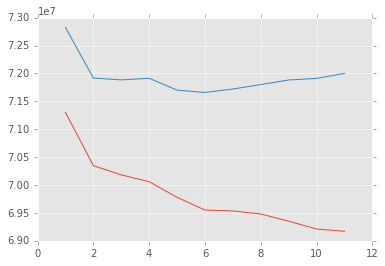

In [2]:
# https://collegescorecard.ed.gov/assets/FullDataDocumentation.pdf
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")

#data.plot.scatter(x="SATVRMID", y="md_earn_wne_p10")

%matplotlib inline



data1 = data[["SATVRMID", "md_earn_wne_p10"]] #put relevant data into sep df
data1 = data1.ix[data['PREDDEG'] == 3]
data1["SATVRMID"] = data1["SATVRMID"] / 200 #scale downed scores
data1["md_earn_wne_p10"] = pd.to_numeric(data1["md_earn_wne_p10"], errors = 'coerce')

data1 = data1.dropna() 
#data1.isnull().any() #detect anymore null values
data1 = data1.reset_index()



#data1["SATVRMID"].max()
#data1["md_earn_wne_p10"].max() 

#data[["a","b"]].dropna()
#data1[["md_earn_wne_p10","SATVRMID"]].dropna()


#predictor = median sat score
# predicted = median 10 year salary

# X = pd.DataFrame({"(Median SAT Verbal Score)": data1["SATVRMID"], "(Median SAT Verbal Score)^2": data1["SATVRMID"] ** 2, \
#                  "(Median SAT Verbal Score)^3": data1["SATVRMID"] ** 3, "(Median SAT Verbal Score)^4": data1["SATVRMID"] ** 4, \
#                  "(Median SAT Verbal Score)^5": data1["SATVRMID"] ** 5, "(Median SAT Verbal Score)^6": data1["SATVRMID"] ** 6, \
#                  "(Median SAT Verbal Score)^7": data1["SATVRMID"] ** 7, "(Median SAT Verbal Score)^8": data1["SATVRMID"] ** 8, \
#                  "(Median SAT Verbal Score)^9": data1["SATVRMID"] ** 9 })

X = pd.DataFrame()

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score


y = pd.DataFrame({"Median 10-year Salary": data1["md_earn_wne_p10"]})

model1 = LinearRegression()


test1_errors = []
train1_errors = []

for p in range(1,12):
    X["SATVRMID^%d" % p] = data1["SATVRMID"] ** p
    model1.fit(X,y)
    y_hat = model1.predict(X)
    train1_errors.append(np.mean( (y-y_hat) ** 2 ))
    test1_errors.append(np.mean(-cross_val_score(model1, X, y, cv = 10, scoring ="mean_squared_error") ) )
    
plt.plot(range(1,12), train1_errors) #train errors can only decrease
plt.plot(range(1,12), test1_errors)



I would choose p = 6 because if p gets too big, the testing error will start increasing and thus the model fitted with p degrees will start losing its capability to predict future data points.

## Question 2 (40 points)

Build at least three different linear regression models for predicting median salary 10 years after graduation. Again, you should restrict to schools that predominantly award Bachelor's degrees.

Try 
incorporating different variables and/or different nonlinear transformations of variables. Each model must contain at least one categorical variable. Estimate the prediction error of each of your models. Which model seems best?

In [3]:
# In this question, you will be trying to build machine learning models using any variables that you think might 
# be relevant for predicting income. I think that you will almost certainly want to include: median SAT Verbal score 
#     (a.k.a. Reading), median SAT Math score, and family income in all of your models. 
#     These are all quantitative variables. The question also asks you to include at least one categorical variable
#     in all of your models. To do this, you will need to use pd.get_dummies() to convert the categorical variable into 
#     something quantitative that you can stick into your X matrix.

#look over first model gone over in class...
# you dont have to make model nonlinear

#model 1:
#Median salary 10 years after grad = b0 + b1MedSATVR + b2MedianSATMath + [Public/privatenonprofit/privateforprofit]
#Median salary 10 years after grad = b0 + b1MedSATVR + b2MedianSATMath +  b3Privatenonprofit + b4 private profit
# <---Public classification is comparision baseline
#you put all, except one var from institution funding classification

data = data.ix[data['PREDDEG'] == 3]

data_sub = data[['SATVRMID','SATMTMID', 'CONTROL']]


X = data[['SATVRMID', 'SATMTMID']]
#now convert control to quantitative
X = pd.concat( [ X ,pd.get_dummies(data_sub['CONTROL']).ix[:,1:2] ], axis =1 ) #concat by col
#this works because if it's not true that something is say..a public, then that variable isn't inserted into yhat
# each row of dummies can only contain public, private nonprofit or private for-profit
y = data['md_earn_wne_p10']
y = pd.to_numeric(y , errors = 'coerce')

#remove null observations, otherwise sklearn won't fit the model
hasNA = (X.isnull().sum(axis=1)==0) & ~y.isnull()

X = X[hasNA]
y = y[hasNA]

#define the model
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
#pick the one with least cross validation error because it needs to account for newer data

model = LinearRegression()

model.fit(X,y)

model1_predict_err_avg = -cross_val_score(model,X,y,cv=10, scoring = "mean_squared_error").mean()

#model2:
#uses U.S. state as predictor

data_sub = data[['SATVRMID','SATMTMID', "STABBR"]]
#data["STABBR"].unique()
X = data[['SATVRMID','SATMTMID']]


X = pd.concat( [X,pd.get_dummies( data_sub["STABBR"] ).ix[:, 0:4 ] ], axis = 1 )
X = pd.concat( [X,pd.get_dummies( data_sub["STABBR"] ).ix[:, 6: ] ], axis = 1 )
#CA is comparison baseline

y = data['md_earn_wne_p10']
y = pd.to_numeric(y , errors = 'coerce')

hasNA = (X.isnull().sum(axis = 1) == 0) & ~y.isnull()

X = X[hasNA]
y = y[hasNA]

model = LinearRegression()

model.fit(X,y)

model2_predict_err_avg = -cross_val_score(model, X, y, cv= 10, scoring = "mean_squared_error").mean()
model2_predict_err_avg

#model3:
#uses cateogrical variable that indicates whether or not school is distance only

data_sub = data[['SATVRMID','SATMTMID', 'DISTANCEONLY']]

X = data[['SATVRMID','SATMTMID']]

X = pd.concat( [ X, pd.get_dummies(data_sub['DISTANCEONLY']).ix[:,1] ], axis = 1 )
#non long dist edu is comparison baseline

y = data['md_earn_wne_p10']
y = pd.to_numeric(y , errors = 'coerce')

hasNA = (X.isnull().sum(axis =1) == 0) & ~y.isnull()
X = X[hasNA]
y = y[hasNA]

model = LinearRegression()
model.fit(X,y)

model3_predict_err_avg = -cross_val_score(model, X, y, cv= 10, scoring = "mean_squared_error").mean()

print(model1_predict_err_avg)
print(model2_predict_err_avg)
print(model3_predict_err_avg)


#model.coef_
#model.coef_..first numer is beta1..for every increase in 1 point





55914968.2267
58649542.2288
55849568.5546


The third model that used the categorical variable for identifying whether or not a school was distance only was seemed like the best model because it had the lowest average prediction error. This means that the third model out of the three is more capable of accuarately predicting median income in 10 years.

## Question 3 (20 points)

Build a model using either decision trees or $k$-nearest neighbors (your choice). Estimate the prediction error of your model. (You may want to try several models, one for each possible tree depth or $k$, using cross-validation to determine the best value.) How does this model compare to your linear regression models from the previous question?

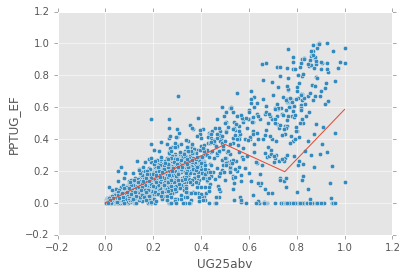

In [4]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors = 10, weights = "uniform") #equal weights

#relationship between proportion of students at a school that is age 25-64 and the proportion of undergrads enrolled part time.
data3 = data[["UG25abv", "PPTUG_EF" ]]
data3.plot.scatter(x="UG25abv", y="PPTUG_EF")
data3 = data3.dropna()

#data3["UG25abv"].count()
#data3["PPTUG_EF"].count()

#pass in training data
model.fit(data3[["UG25abv"]], data3["PPTUG_EF"])

x_test = np.linspace(0,1, 5)

y_test = model.predict(pd.DataFrame(x_test)) # construct the regression equation
#must reconstruct x_test before using predict

plt.plot(x_test,y_test, '-')

In [5]:
test_errors = -1


    
model = KNeighborsRegressor(9)
test_errors = np.mean(-cross_val_score(model, data3[["UG25abv"]], data3["PPTUG_EF"], cv = 10, scoring = "mean_squared_error"  ) ) 
    
#plt.plot(range(1,20), test_errors)
test_errors

0.024925932297700015

The prediction error of my model is 0.0249. The prediction error does far more reasonable compared to the test errors from the models from the previous question.

## Question 4 (10 points)

Choose your favorite model from above. This model predicts how much you would expect a graduate of each college to earn based on their socioeconomic status and academic aptitude. Then, it makes sense to define the value-added of a college in terms of how much the actual outcomes differ from what would be predicted based on these indicators.

$$\text{Value added} = \text{Actual median salary} - \text{Predicted median salary}$$

For example, it is true that graduates from USC make more money than graduates from Cal State LA. But this doesn't necessarily mean that USC is the better school; its students may have done better no matter where they went to college. To understand which school is better, we need to compare how much value the school adds to its students.

Sort the schools by your "value added" score. What are the Top 10 schools? Where does Cal Poly rank in your college ranking? (Your college ranking should only include schools that predominantly award Bachelors' degrees.)

In [6]:
model = LinearRegression()

data3 = data[["SATVRMID", "md_earn_wne_p10"]] #put relevant data into sep df
data3 = data3.ix[data['PREDDEG'] == 3]
data3["SATVRMID"] = data3["SATVRMID"] / 200 #scale downed scores
data3["md_earn_wne_p10"] = pd.to_numeric(data3["md_earn_wne_p10"], errors = 'coerce')

data3 = data3.dropna() 
#data1.isnull().any() #detect anymore null values
data3 = data3.reset_index()

X = pd.DataFrame()
y = pd.DataFrame({"Median 10-year Salary": data3["md_earn_wne_p10"]})

# for p in range(1,7):
#     X["SATVRMID^%d" % p] = data3["SATVRMID"] ** p
#     model.fit(X,y)
#     y_hat = model.predict(X) #return array of arrays..need to collaspe arrays
    
X["SATVRMID^6"] = data3["SATVRMID"] ** 6
model.fit(X,y)
y_hat = model.predict(X) #return array of arrays..need to collaspe arrays

y_hat_1D = []

#use extend to "collaspe" arrays within the main array
for item in y_hat:
    y_hat_1D.extend(item)

y_hat_df = pd.DataFrame({"Predicted Median Salary": y_hat_1D})
 
data['Value Added'] = y["Median 10-year Salary"] - y_hat_df["Predicted Median Salary"]

data = data.sort_values(by = 'Value Added', ascending = False)

data = data.reset_index()
data.index = data.index +1

data.head(n = 10)





/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,index,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,...,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP,C200_L4_POOLED_SUPP,C200_4_POOLED_SUPP,Value Added
1,70,103723,2160305,21603,Collins College,Phoenix,AZ,85040,NaN,NaN,...,0.558676028084,0.425767488676,0.304420350292,0.380553227158,0.417823228634,NaN,NaN,NaN,NaN,39322.350268
2,388,117168,2330500,23305,Laguna College of Art and Design,Laguna Beach,CA,92651,NaN,NaN,...,0.923076923077,0.955223880597,0.83606557377,0.848484848485,0.93023255814,NaN,NaN,NaN,NaN,34237.025882
3,598,126580,450900,4509,University of Colorado-Colorado Springs,Colorado Springs,CO,80918,NaN,NaN,...,0.86761487965,0.832041343669,0.831205673759,0.821124361158,0.841161400512,NaN,NaN,NaN,NaN,33982.651948
4,588,126076,2262400,22624,Yeshiva Ohr Elchonon Chabad West Coast Talmudi...,Los Angeles,CA,90046,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23263.290838
5,252,110617,115000,1150,California State University-Sacramento,Sacramento,CA,95819-2694,NaN,NaN,...,0.89058413252,0.862368421053,0.848407643312,0.8552141527,0.864623243934,NaN,NaN,NaN,NaN,21919.109240
6,928,139287,3635300,36353,Carver Bible College,Atlanta,GA,30331,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18695.757676
7,164,107044,109700,1097,Harding University,Searcy,AR,72143,NaN,NaN,...,0.92507204611,0.893997445722,0.850819672131,0.852307692308,0.890873015873,NaN,NaN,NaN,NaN,18591.597101
8,395,117575,3332300,33323,Southern California Seminary,El Cajon,CA,92019-1108,NaN,NaN,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,NaN,NaN,NaN,18437.025882
9,24,101453,2199700,21997,Heritage Christian University,Florence,AL,35630-9977,NaN,NaN,...,PrivacySuppressed,PrivacySuppressed,0.638888888889,PrivacySuppressed,PrivacySuppressed,NaN,NaN,NaN,NaN,17435.153864
10,653,128391,137200,1372,Western State College of Colorado,Gunnison,CO,81231,NaN,NaN,...,0.832941176471,0.824324324324,0.767489711934,0.775330396476,0.821568627451,NaN,NaN,NaN,NaN,16869.249845


In [7]:
data.ix[data["CITY"] == 'San Luis Obispo']

,index,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,...,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP,C200_L4_POOLED_SUPP,C200_4_POOLED_SUPP,Value Added
358,238,110422,114300,1143,California Polytechnic State University-San Lu...,San Luis Obispo,CA,93407,NaN,NaN,...,0.960193652501,0.948094612352,0.944585663447,0.926645091694,0.956429780034,NaN,NaN,NaN,NaN,-7955.72806


YOUR ANSWER HERE